In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import concatenate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset and insert column names, remove the semicolon
#Data preprocessing
data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)

C:\Users\procns\AppData\Local\Temp\ipykernel_6132\1340352067.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)


###  19 activities, 8 subject, 60 series -> 125 rows 45 columns

In [3]:
data.head(3600)

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity,subject_id,segments
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730,1,1,1
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514,1,1,1
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219,1,1,1
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750,1,1,1
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,7.8015,1.3138,5.8588,-0.002519,0.017479,-0.000679,-0.79434,-0.077437,0.11570,0.30175,...,2.6304,0.005635,0.009238,-0.003629,0.74160,0.30357,-0.057071,1,1,29
3596,7.7867,1.3140,5.8213,-0.018844,0.010386,-0.002498,-0.79453,-0.076756,0.11461,0.32389,...,2.6380,0.006434,0.007593,0.003591,0.73980,0.30381,-0.056066,1,1,29
3597,7.7868,1.3141,5.7990,0.006585,0.022728,-0.004341,-0.79326,-0.077579,0.11575,0.34342,...,2.6229,-0.004479,0.004084,0.009026,0.74021,0.30223,-0.056156,1,1,29
3598,7.8015,1.2991,5.8214,0.010103,0.001177,-0.006066,-0.79301,-0.076274,0.11548,0.34336,...,2.6225,-0.004185,0.012646,-0.010807,0.74017,0.30302,-0.056573,1,1,29


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140000 entries, 0 to 1139999
Data columns (total 48 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   T_xacc      1140000 non-null  float64
 1   T_yacc      1140000 non-null  float64
 2   T_zacc      1140000 non-null  float64
 3   T_xgyro     1140000 non-null  float64
 4   T_ygyro     1140000 non-null  float64
 5   T_zgyro     1140000 non-null  float64
 6   T_xmag      1140000 non-null  float64
 7   T_ymag      1140000 non-null  float64
 8   T_zmag      1140000 non-null  float64
 9   RA_xacc     1140000 non-null  float64
 10  RA_yacc     1140000 non-null  float64
 11  RA_zacc     1140000 non-null  float64
 12  RA_xgyro    1140000 non-null  float64
 13  RA_ygyro    1140000 non-null  float64
 14  RA_zgyro    1140000 non-null  float64
 15  RA_xmag     1140000 non-null  float64
 16  RA_ymag     1140000 non-null  float64
 17  RA_zmag     1140000 non-null  float64
 18  LA_xacc     1140000 no

In [5]:
columns = []
units = ["T","RA","LA","RL","LL"]
movs = ["acc","gyro","mag"]
axises = ["x","y","z"]

#Creating the columns names
def create_data_col():
    for unit in units :
        for mov in movs :
            for axis in axises :
                name_col = "{}_{}{}".format(unit, axis, mov)
                columns.append(name_col)
                
create_data_col()
columns

['T_xacc',
 'T_yacc',
 'T_zacc',
 'T_xgyro',
 'T_ygyro',
 'T_zgyro',
 'T_xmag',
 'T_ymag',
 'T_zmag',
 'RA_xacc',
 'RA_yacc',
 'RA_zacc',
 'RA_xgyro',
 'RA_ygyro',
 'RA_zgyro',
 'RA_xmag',
 'RA_ymag',
 'RA_zmag',
 'LA_xacc',
 'LA_yacc',
 'LA_zacc',
 'LA_xgyro',
 'LA_ygyro',
 'LA_zgyro',
 'LA_xmag',
 'LA_ymag',
 'LA_zmag',
 'RL_xacc',
 'RL_yacc',
 'RL_zacc',
 'RL_xgyro',
 'RL_ygyro',
 'RL_zgyro',
 'RL_xmag',
 'RL_ymag',
 'RL_zmag',
 'LL_xacc',
 'LL_yacc',
 'LL_zacc',
 'LL_xgyro',
 'LL_ygyro',
 'LL_zgyro',
 'LL_xmag',
 'LL_ymag',
 'LL_zmag']

In [6]:
# 하나의 subject는 125개의 timestamps 데이터 60개를 19개 행동마다 가지고 있다
# shape는 (-1, 100, 45 )

In [7]:
data.subject_id.value_counts()

1    142500
2    142500
3    142500
4    142500
5    142500
6    142500
7    142500
8    142500
Name: subject_id, dtype: int64

In [11]:
TIME_PERIODS = 125
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 125
LABEL = 'activity'

In [7]:
for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        data[column] = data[column] / data[column].max()
data.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity,subject_id,segments
0,0.086777,0.025233,0.044982,-0.000342,0.000133,-0.000178,-0.770553,-0.067566,0.163278,0.009783,...,0.043006,-0.000012,-0.001356,-0.000627,0.538658,0.241080,-0.055371,1,1,1
1,0.086777,0.024875,0.044672,-0.000339,0.001633,0.000101,-0.770602,-0.066229,0.164938,0.010025,...,0.043003,-0.000772,-0.001848,0.000392,0.538076,0.242123,-0.055164,1,1,1
2,0.087096,0.024873,0.044489,0.000544,0.000997,0.000011,-0.770083,-0.066230,0.164824,0.009748,...,0.043246,-0.000667,0.000641,-0.001114,0.538207,0.241072,-0.054881,1,1,1
3,0.087095,0.024509,0.044611,0.000249,0.001255,0.000293,-0.768762,-0.067755,0.165167,0.010160,...,0.042760,-0.000299,0.001079,0.000922,0.538745,0.242131,-0.055390,1,1,1
4,0.087097,0.025053,0.044365,0.000318,0.002116,-0.000278,-0.770847,-0.066734,0.165208,0.009989,...,0.043003,-0.000205,-0.000939,0.000396,0.537406,0.241377,-0.055176,1,1,1


In [8]:
df_train = data[data['subject_id'] < 7]
df_test = data[data['subject_id'] >=7]

In [9]:
df_test.shape, df_train.shape

((285000, 48), (855000, 48))

In [12]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels

X_train, y_train = create_segments_and_labels(df_train, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
X_test, y_test = create_segments_and_labels(df_test, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

C:\Users\procns\AppData\Local\Temp\ipykernel_6132\3525974209.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (6839, 125, 45)
labels shape : (6839,)
reshaped_segments shape :  (2279, 125, 45)
labels shape : (2279,)


In [13]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")

In [14]:
y_train =  y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

print(X_train.shape, y_train.shape)

(6839, 125, 45) (6839, 19)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [16]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=verbose)
model.summary()

Epoch 1/10
214/214 [==============================] - 7s 24ms/step - loss: 0.4785 - accuracy: 0.8533
Epoch 2/10
214/214 [==============================] - 5s 23ms/step - loss: 0.0983 - accuracy: 0.9659
Epoch 3/10
214/214 [==============================] - 5s 21ms/step - loss: 0.0676 - accuracy: 0.9782
Epoch 4/10
214/214 [==============================] - 4s 21ms/step - loss: 0.0477 - accuracy: 0.9829
Epoch 5/10
214/214 [==============================] - 5s 22ms/step - loss: 0.0375 - accuracy: 0.9871
Epoch 6/10
214/214 [==============================] - 5s 23ms/step - loss: 0.0274 - accuracy: 0.9905
Epoch 7/10
214/214 [==============================] - 5s 22ms/step - loss: 0.0307 - accuracy: 0.9883
Epoch 8/10
214/214 [==============================] - 5s 22ms/step - loss: 0.0320 - accuracy: 0.9895
Epoch 9/10
214/214 [==============================] - 5s 22ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 10/10
214/214 [==============================] - 5s 23ms/step - loss: 0.0207 - accura

In [19]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 1s 7ms/step - loss: 0.7052 - accuracy: 0.8907
Accuracy >89.074153
Base Loss >0.71


# 함수 사용하여 구현

In [13]:
def load_dataset():
    TIME_PERIODS = 100
    STEP_DISTANCE = 50
    LABEL = 'activity'
    
    columns = []
    units = ["T","RA","LA","RL","LL"]
    movs = ["acc","gyro","mag"]
    axises = ["x","y","z"]

    for unit in units :
        for mov in movs :
            for axis in axises :
                name_col = "{}_{}{}".format(unit, axis, mov)
                columns.append(name_col)
    #Load dataset and insert column names, remove the semicolon
    #Data preprocessing
    data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)         
    #data scaling ( 0 ~ 1)
    data = scaler(data, columns)
    
    df_train = data[data['subject_id'] < 7]
    df_test = data[data['subject_id'] >=7]
    
    X_train, y_train = create_segments_and_labels(df_train, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
    X_test, y_test = create_segments_and_labels(df_test, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
    
    y_train, y_test  = onehotencoding_data(y_train, y_test)
    print("X_train.shape :", X_train.shape)
    print("y_train.shape :", y_train.shape)
    print("X_test.shape:", X_test.shape) 
    print("y_test.shape:", y_test.shape)
    return X_train, y_train, X_test, y_test

In [14]:
def scaler(data, columns):
    for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        data[column] = data[column] / data[column].max()
    return data

In [15]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels

In [16]:
def onehotencoding_data(train, test):
    train =  train.reshape(-1,1)
    test = test.reshape(-1,1)
    enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
    enc = enc.fit(train)

    train = enc.transform(train)
    test = enc.transform(test)
    return train, test

In [17]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 20, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [18]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [19]:
# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

In [20]:
run_experiment()

C:\Users\procns\AppData\Local\Temp\ipykernel_13876\4049903537.py:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)
C:\Users\procns\AppData\Local\Temp\ipykernel_13876\1722284917.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (17098, 100, 45)
labels shape : (17098,)
reshaped_segments shape :  (5698, 100, 45)
labels shape : (5698,)
X_train.shape : (17098, 100, 45)
y_train.shape : (17098, 19)
X_test.shape: (5698, 100, 45)
y_test.shape: (5698, 19)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


>#1: 85.574
>#2: 83.573
>#3: 87.206
>#4: 86.785
>#5: 84.626
>#6: 87.539
>#7: 84.731
>#8: 84.925
>#9: 86.241
>#10: 86.381
[85.5738878250122, 83.57318639755249, 87.20603585243225, 86.78483963012695, 84.62618589401245, 87.5394880771637, 84.73148345947266, 84.92453694343567, 86.24078631401062, 86.38118505477905]
Accuracy: 85.758% (+/-1.216)


# Number of Filters

In [21]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [22]:
# summarize scores
def summarize_results(scores, params):
 print(scores, params)
 # summarize mean and standard deviation
 for i in range(len(scores)):
     m, s = mean(scores[i]), std(scores[i])
     print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
 # boxplot of scores
 pyplot.boxplot(scores, labels=params)
 #pyplot.savefig('exp_cnn_filters.png')

In [23]:
# run an experiment
def run_experiment(params, repeats=10):
 # load data
 trainX, trainy, testX, testy = load_dataset()
 # test each parameter
 all_scores = list()
 for p in params:
     # repeat experiment
     scores = list()
     for r in range(repeats):
         score = evaluate_model(trainX, trainy, testX, testy, p)
         score = score * 100.0
         print('>p=%d #%d: %.3f' % (p, r+1, score))
         scores.append(score)
     all_scores.append(scores)
 # summarize results
 summarize_results(all_scores, params)

C:\Users\procns\AppData\Local\Temp\ipykernel_13876\4049903537.py:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)
C:\Users\procns\AppData\Local\Temp\ipykernel_13876\1722284917.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (17098, 100, 45)
labels shape : (17098,)
reshaped_segments shape :  (5698, 100, 45)
labels shape : (5698,)
X_train.shape : (17098, 100, 45)
y_train.shape : (17098, 19)
X_test.shape: (5698, 100, 45)
y_test.shape: (5698, 19)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


>p=8 #1: 87.224
>p=8 #2: 87.136
>p=8 #3: 82.362
>p=8 #4: 84.819
>p=8 #5: 85.188
>p=8 #6: 80.432
>p=8 #7: 85.732
>p=8 #8: 86.416
>p=8 #9: 82.555
>p=8 #10: 86.135
>p=16 #1: 87.610
>p=16 #2: 86.100
>p=16 #3: 84.328
>p=16 #4: 86.715
>p=16 #5: 88.119
>p=16 #6: 83.468
>p=16 #7: 85.451
>p=16 #8: 85.732
>p=16 #9: 88.189
>p=16 #10: 87.066
>p=32 #1: 86.171
>p=32 #2: 86.697
>p=32 #3: 85.065
>p=32 #4: 78.256
>p=32 #5: 84.258
>p=32 #6: 86.083
>p=32 #7: 86.276
>p=32 #8: 87.855
>p=32 #9: 84.872
>p=32 #10: 85.714
>p=64 #1: 87.048
>p=64 #2: 85.065
>p=64 #3: 83.380
>p=64 #4: 84.100
>p=64 #5: 83.714
>p=64 #6: 88.031
>p=64 #7: 85.293
>p=64 #8: 87.680
>p=64 #9: 84.187
>p=64 #10: 88.821
>p=128 #1: 82.380
>p=128 #2: 84.223
>p=128 #3: 86.925
>p=128 #4: 84.679
>p=128 #5: 86.732
>p=128 #6: 86.065
>p=128 #7: 86.925
>p=128 #8: 83.012
>p=128 #9: 88.277
>p=128 #10: 85.381
>p=256 #1: 85.609
>p=256 #2: 81.537
>p=256 #3: 83.187
>p=256 #4: 83.398
>p=256 #5: 87.206
>p=256 #6: 88.382
>p=256 #7: 81.625
>p=256 #8: 88.206
>

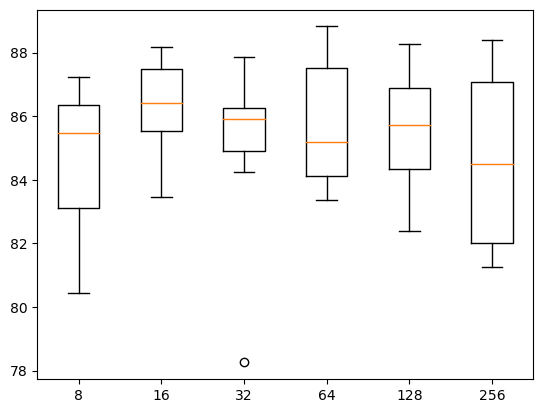

In [24]:
# run the experiment
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

# Size of kernel 

In [25]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_kernel):
 verbose, epochs, batch_size = 0, 15, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [26]:
# summarize scores
def summarize_results(scores, params):
 print(scores, params)
 # summarize mean and standard deviation
 for i in range(len(scores)):
     m, s = mean(scores[i]), std(scores[i])
     print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
 # boxplot of scores
 pyplot.boxplot(scores, labels=params)
 #pyplot.savefig('exp_cnn_kernel.png')

In [27]:
# run an experiment
def run_experiment(params, repeats=10):
 # load data
 trainX, trainy, testX, testy = load_dataset()
 # test each parameter
 all_scores = list()
 for p in params:
 # repeat experiment
     scores = list()
     for r in range(repeats):
         score = evaluate_model(trainX, trainy, testX, testy, p)
         score = score * 100.0
         print('>p=%d #%d: %.3f' % (p, r+1, score))
         scores.append(score)
     all_scores.append(scores)
 # summarize results
 summarize_results(all_scores, params)

C:\Users\procns\AppData\Local\Temp\ipykernel_13876\4049903537.py:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)
C:\Users\procns\AppData\Local\Temp\ipykernel_13876\1722284917.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (17098, 100, 45)
labels shape : (17098,)
reshaped_segments shape :  (5698, 100, 45)
labels shape : (5698,)
X_train.shape : (17098, 100, 45)
y_train.shape : (17098, 19)
X_test.shape: (5698, 100, 45)
y_test.shape: (5698, 19)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


>p=2 #1: 86.399
>p=2 #2: 86.697
>p=2 #3: 82.555
>p=2 #4: 85.960
>p=2 #5: 88.803
>p=2 #6: 87.645
>p=2 #7: 87.188
>p=2 #8: 85.504
>p=2 #9: 83.222
>p=2 #10: 84.872
>p=3 #1: 80.906
>p=3 #2: 86.188
>p=3 #3: 81.572
>p=3 #4: 86.399
>p=3 #5: 84.205
>p=3 #6: 84.714
>p=3 #7: 82.204
>p=3 #8: 81.204
>p=3 #9: 88.610
>p=3 #10: 84.784
>p=5 #1: 81.923
>p=5 #2: 87.048
>p=5 #3: 86.522
>p=5 #4: 86.434
>p=5 #5: 81.046
>p=5 #6: 80.730
>p=5 #7: 78.905
>p=5 #8: 85.679
>p=5 #9: 82.380
>p=5 #10: 81.432
>p=7 #1: 82.713
>p=7 #2: 83.626
>p=7 #3: 82.959
>p=7 #4: 81.906
>p=7 #5: 86.522
>p=7 #6: 81.748
>p=7 #7: 86.416
>p=7 #8: 84.907
>p=7 #9: 85.065
>p=7 #10: 83.836
>p=11 #1: 73.833
>p=11 #2: 78.501
>p=11 #3: 78.308
>p=11 #4: 74.500
>p=11 #5: 78.098
>p=11 #6: 78.729
>p=11 #7: 74.605
>p=11 #8: 74.026
>p=11 #9: 77.764
>p=11 #10: 77.694
[[86.3987386226654, 86.69708967208862, 82.55528211593628, 85.95998883247375, 88.80308866500854, 87.6447856426239, 87.18848824501038, 85.50368547439575, 83.22218060493469, 84.87188220024

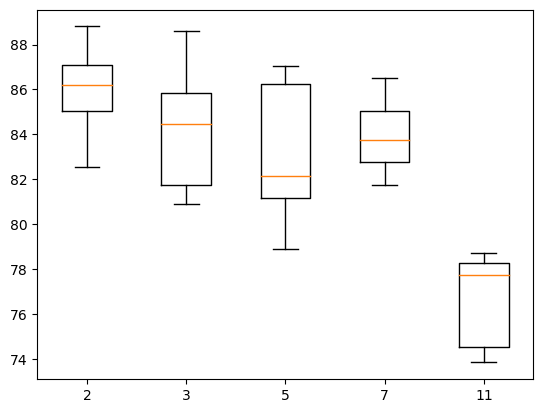

In [28]:
# run the experiment
n_params = [2, 3, 5, 7, 11]
run_experiment(n_params)

# Multi-Headed Convolutional Neural Network

In [29]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 # head 1
 inputs1 = Input(shape=(n_timesteps,n_features))
 conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs1)
 drop1 = Dropout(0.5)(conv1)
 pool1 = MaxPooling1D(pool_size=2)(drop1)
 flat1 = Flatten()(pool1)
 # head 2
 inputs2 = Input(shape=(n_timesteps,n_features))
 conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs2)
 drop2 = Dropout(0.5)(conv2)
 pool2 = MaxPooling1D(pool_size=2)(drop2)
 flat2 = Flatten()(pool2)
 # head 3
 inputs3 = Input(shape=(n_timesteps,n_features))
 conv3 = Conv1D(filters=64, kernel_size=11, activation='relu')(inputs3)
 drop3 = Dropout(0.5)(conv3)
 pool3 = MaxPooling1D(pool_size=2)(drop3)
 flat3 = Flatten()(pool3)
 # merge
 merged = concatenate([flat1, flat2, flat3])
 # interpretation
 dense1 = Dense(100, activation='relu')(merged)
 outputs = Dense(n_outputs, activation='softmax')(dense1)
 model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
 # save a plot of the model
 #plot_model(model, show_shapes=True, to_file='multichannel.png')
 plot_model(model, show_shapes=True)
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit([trainX,trainX,trainX], trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate([testX,testX,testX], testy, batch_size=batch_size, verbose=0)
 return accuracy

In [30]:
# summarize scores
def summarize_results(scores):
 print(scores)
 m, s = mean(scores), std(scores)
 print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [31]:
# run an experiment
def run_experiment(repeats=10):
 # load data
 trainX, trainy, testX, testy = load_dataset()
 # repeat experiment
 scores = list()
 for r in range(repeats):
     score = evaluate_model(trainX, trainy, testX, testy)
     score = score * 100.0
     print('>#%d: %.3f' % (r+1, score))
     scores.append(score)
 # summarize results
 summarize_results(scores)

In [34]:
# run the experiment
run_experiment()

C:\Users\procns\AppData\Local\Temp\ipykernel_13876\4049903537.py:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/DSADS/DASDS_raw.csv', error_bad_lines=False)
C:\Users\procns\AppData\Local\Temp\ipykernel_13876\1722284917.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (17098, 100, 45)
labels shape : (17098,)
reshaped_segments shape :  (5698, 100, 45)
labels shape : (5698,)
X_train.shape : (17098, 100, 45)
y_train.shape : (17098, 19)
X_test.shape: (5698, 100, 45)
y_test.shape: (5698, 19)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


>#1: 86.522
>#2: 87.996
>#3: 84.802
>#4: 85.118
>#5: 84.731
>#6: 85.258
>#7: 81.064
>#8: 82.257
>#9: 80.379
>#10: 83.556
[86.52158379554749, 87.99578547477722, 84.80168581008911, 85.1175844669342, 84.73148345947266, 85.25798320770264, 81.06353282928467, 82.25693106651306, 80.3790807723999, 83.55563282966614]
Accuracy: 84.168% (+/-2.259)
